In [23]:
!pip install --upgrade pymupdf

## Ekstraksi PDF ke Teks

In [24]:
import pymupdf

doc = pymupdf.open("contoh.pdf") # open a document
out = open("output.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
out.close()

In [25]:
!pip install nltk

In [27]:
with open('output.txt', 'r', encoding='utf-8') as file:
    teks = file.read()

print(teks[:200])  # tampilkan 200 karakter pertama

 
Jurnal Manajemen Informatika (JAMIKA) 
Volume 13 Nomor 1 Edisi April 2023 
E ISSN: 2655-6960 | P ISSN: 2088-4125 
OJS: https://ojs.unikom.ac.id/index.php/jamika 
 
 
doi : 10.34010/jamika.v13i1.9424


In [42]:
#text = "Ini adalah kalimat pertama. Ini kalimat kedua? Ya!"
sentences = nltk.sent_tokenize(teks)
print(sentences)
# Output: ['Ini adalah kalimat pertama.', 'Ini kalimat kedua?', 'Ya!']

[' \nJurnal Manajemen Informatika (JAMIKA) \nVolume 13 Nomor 1 Edisi April 2023 \nE ISSN: 2655-6960 | P ISSN: 2088-4125 \nOJS: https://ojs.unikom.ac.id/index.php/jamika \n \n \ndoi : 10.34010/jamika.v13i1.9424    \n \n \n84\nPembobotan TF-IDF Menggunakan Naïve Bayes Pada Sentimen Masyarakat \nMengenai Isu Kenaikan BIPIH \n \nTF-IDF Weighting Using Naïve Bayes on Public Sentiment on The \nIssue of Rising BIPIH \n \nRisa Wati1*, Siti Ernawati2, Hilda Rachmi3 \n1,3Program Studi Sistem Informasi, Universitas Bina Sarana Informatika, Jakarta, Indonesia \n2Program Studi Sistem Informasi, Universitas Nusa Mandiri, Jakarta, Indonesia  \n*E-mail: risawati.rwx@bsi.ac.id \n \n \nAbstrak \nKementerian agama mengusulkan untuk menaikkan Biaya Perjalanan Ibadah Haji (Bipih) tahun 1444 H/2023 M menjadi \nRp.69,19 juta.', 'Terdapat kenaikan biaya yang cukup tinggi dibandingkan tahun 2022.', 'Hal ini menimbulkan sentimen pada \nmasyarakat, terdapat opini masyarakat yang pro dan kontra terhadap isu kenai

### save ke csv

In [29]:
import pandas as pd
df = pd.DataFrame(sentences, columns=['kalimat'])
print(df)

                                               kalimat
0     \nJurnal Manajemen Informatika (JAMIKA) \nVol...
1    Terdapat kenaikan biaya yang cukup tinggi diba...
2    Hal ini menimbulkan sentimen pada \nmasyarakat...
3    Tujuan \ndari penelitian ini adalah untuk meng...
4    Naive Baye \nmerupakan salah satu algoritma pe...
..                                                 ...
226                                            15, no.
227                                           1, 2021.
228                                       [20] \n“1.9.
229  Naive Bayes.” https://scikit-learn.org/stable/...
230                                       13, \n2023).

[231 rows x 1 columns]


In [30]:
df.to_csv('kalimat.csv', index=False, encoding='utf-8')
df.head()

,kalimat
0,\nJurnal Manajemen Informatika (JAMIKA) \nVol...
1,Terdapat kenaikan biaya yang cukup tinggi diba...
2,Hal ini menimbulkan sentimen pada \nmasyarakat...
3,Tujuan \ndari penelitian ini adalah untuk meng...
4,Naive Baye \nmerupakan salah satu algoritma pe...


In [43]:
print("jumlah data:",len(df))
print(df['kalimat'].head(20))

jumlah data: 232
0                                               kalimat
1      \nJurnal Manajemen Informatika (JAMIKA) \nVol...
2     Terdapat kenaikan biaya yang cukup tinggi diba...
3     Hal ini menimbulkan sentimen pada \nmasyarakat...
4     Tujuan \ndari penelitian ini adalah untuk meng...
5     Naive Baye \nmerupakan salah satu algoritma pe...
6               Data diambil dari media sosial twitter.
7     Data \ndikelompokkan menjadi opini pro dan opi...
8                Data yang digunakan sebanyak 850 data.
9     Data dibagi menjadi data training dan data tes...
10    Dengan jumlah data training sebesar 679 data d...
11    Selanjutnya \nmengimplementasikan algoritma Mu...
12    Hasil uji coba diperoleh nilai akurasi sebesar...
13    Terbukti bahwa algoritma Multinominal Naive Ba...
14    Kata kunci: BIPIH; Naïve Bayes; Analisis Senti...
15    Abstract \nThe Ministry of Religious Affairs p...
16    There is a fairly high increase in costs compa...
17    This raises sentiment in 

In [44]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict, Counter
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Preprocessing dan Membangun Matrix

In [50]:
# -------------------------------------------------------------
# 1. Load dataset (ambil hanya kolom pertama karena itu kalimatnya)
# -------------------------------------------------------------
df = pd.read_csv("kalimat.csv", header=None)
df = df[[0]]         # Kolom pertama saja
df.columns = ['kalimat']

# Buang baris kosong atau NaN
df = df.dropna()
df = df[df['kalimat'].str.strip() != ""]

# -------------------------------------------------------------
# 2. Gabungkan semua teks
# -------------------------------------------------------------
text = " ".join(df['kalimat'].astype(str))

# -------------------------------------------------------------
# 3. Bersihkan teks untuk hilangkan noise
# -------------------------------------------------------------
# Hapus URL
text = re.sub(r"http\S+|www\.\S+", " ", text)

# Hapus angka
text = re.sub(r"\d+", " ", text)

# Hapus tanda baca
text = re.sub(r"[^a-zA-Z ]", " ", text)

# Jadikan huruf kecil
text = text.lower()

# Hapus spasi berlebih
text = re.sub(r"\s+", " ", text).strip()

# -------------------------------------------------------------
# 4. Tokenisasi
# -------------------------------------------------------------
words = word_tokenize(text)

# 5. stopword
stop_words = set(stopwords.words("indonesian"))
words = [w for w in words if w not in stop_words]

# 6. Buang kata sangat pendek (opsional)
words = [w for w in words if len(w) > 2]

# -------------------------------------------------------------
# 6. Co-occurrence Window
# -------------------------------------------------------------
window_size = 8
co_occurrences = defaultdict(Counter)

for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][words[j]] += 1

# -------------------------------------------------------------
# 7. Bangun Matriks
# -------------------------------------------------------------
unique_words = list(co_occurrences.keys())
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)
#
print("jumlah kata unik",len(unique_words))
word_index = {word: idx for idx, word in enumerate(unique_words)}

for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        if neighbor in word_index:
            co_matrix[word_index[word]][word_index[neighbor]] = count

co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)

co_matrix_df

jumlah kata unik 781


,kalimat,jurnal,manajemen,informatika,jamika,volume,nomor,edisi,april,issn,...,chihab,bencharef,lstm,vader,hybrid,darwis,siskawati,abidin,bmkg,nasional
kalimat,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
jurnal,1,0,10,10,10,10,10,10,10,10,...,0,0,0,0,0,0,0,0,0,0
manajemen,1,10,0,10,10,10,10,10,10,20,...,0,0,0,0,0,0,0,0,0,0
informatika,1,10,10,0,10,10,10,10,10,20,...,0,0,0,0,0,0,0,0,0,0
jamika,1,10,10,10,0,20,20,20,20,40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
darwis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
siskawati,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
abidin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
bmkg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
print("jumlah kata unik:",len(unique_words))
# print(word_index)
# word_index.head()
print("First 5 items of word_index:", list(word_index.items())[:5])

jumlah kata unik: 781
First 5 items of word_index: [('kalimat', 0), ('jurnal', 1), ('manajemen', 2), ('informatika', 3), ('jamika', 4)]


## Word Graph

In [47]:
!pip install networkx

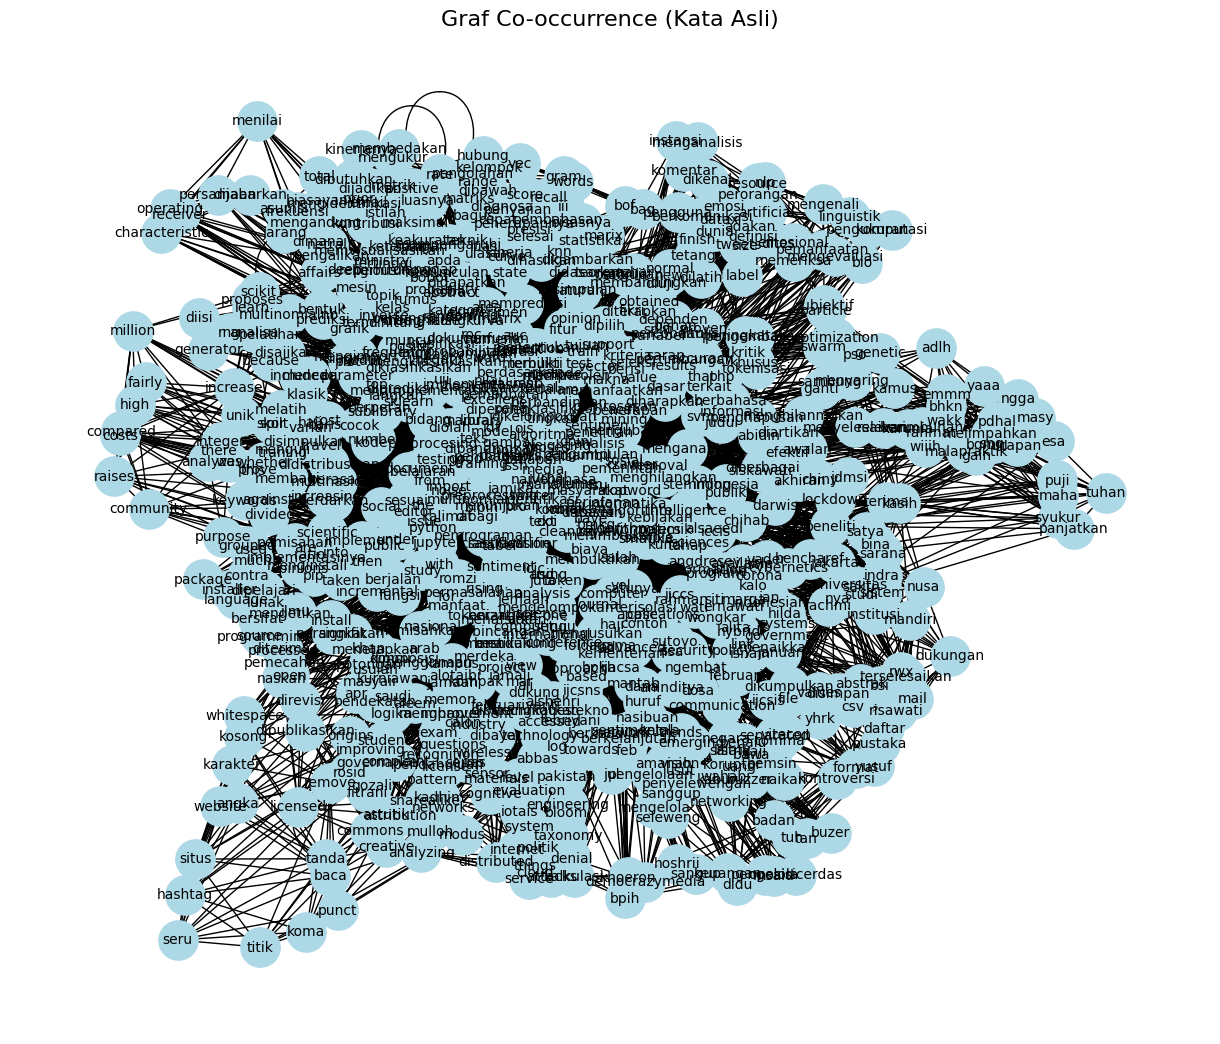

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graph dengan node berupa kata asli
G = nx.Graph()

for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        if count > 0:
            G.add_edge(word, neighbor, weight=count)

# Visualisasi
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3)

nx.draw(G, pos,
        with_labels=True,
        node_color='lightblue',
        node_size=800,
        font_size=10)

plt.title("Graf Co-occurrence (Kata Asli)", fontsize=16)
plt.show()

In [36]:
print("Jumlah kata dalam graph:", G.number_of_nodes())
print("Contoh node:", list(G.nodes())[:20])


Jumlah kata dalam graph: 781
Contoh node: ['kalimat', 'jurnal', 'manajemen', 'informatika', 'jamika', 'volume', 'nomor', 'edisi', 'april', 'kosong', 'remove', 'whitespace', 'tokenization', 'proses', 'pemecahan', 'teks', 'potongan', 'memisahkan', 'menafsirkan', 'mengelompokan']


In [37]:
print("Jumlah edge:", G.number_of_edges())
print("Contoh edge:", list(G.edges(data=True))[:20])

Jumlah edge: 10977
Contoh edge: [('kalimat', 'jurnal', {'weight': 1}), ('kalimat', 'manajemen', {'weight': 1}), ('kalimat', 'informatika', {'weight': 1}), ('kalimat', 'jamika', {'weight': 1}), ('kalimat', 'volume', {'weight': 1}), ('kalimat', 'nomor', {'weight': 1}), ('kalimat', 'edisi', {'weight': 1}), ('kalimat', 'april', {'weight': 1}), ('kalimat', 'kosong', {'weight': 1}), ('kalimat', 'remove', {'weight': 1}), ('kalimat', 'whitespace', {'weight': 1}), ('kalimat', 'tokenization', {'weight': 3}), ('kalimat', 'proses', {'weight': 5}), ('kalimat', 'pemecahan', {'weight': 1}), ('kalimat', 'teks', {'weight': 2}), ('kalimat', 'potongan', {'weight': 1}), ('kalimat', 'memisahkan', {'weight': 1}), ('kalimat', 'menafsirkan', {'weight': 1}), ('kalimat', 'mengelompokan', {'weight': 1}), ('kalimat', 'token', {'weight': 1})]


## PageRank

In [38]:
import networkx as nx

pagerank_scores = nx.pagerank(G, alpha=0.85)
print(pagerank_scores)

{'kalimat': 0.00102945594956916, 'jurnal': 0.0027297565837563014, 'manajemen': 0.0027205858982555908, 'informatika': 0.003536824553130675, 'jamika': 0.005821772884615603, 'volume': 0.0026860965573943115, 'nomor': 0.003343129223968817, 'edisi': 0.0027274194701098257, 'april': 0.002726937065665607, 'kosong': 0.0006570208157047453, 'remove': 0.001115074094392895, 'whitespace': 0.0006470843703809293, 'tokenization': 0.0026516839459335036, 'proses': 0.007752061045047088, 'pemecahan': 0.0006083057068341318, 'teks': 0.006341569559833756, 'potongan': 0.0005865587539101893, 'memisahkan': 0.0005674567236027153, 'menafsirkan': 0.0005685018471087566, 'mengelompokan': 0.0005576721928969363, 'token': 0.0009280258779780534, 'penelitian': 0.010373731843153485, 'apda': 0.0005061551311844047, 'bidang': 0.0011768134213314355, 'analisis': 0.004475132699228882, 'sentimen': 0.007543220942075869, 'mengubah': 0.0016035484648679167, 'data': 0.03129127539490022, 'kumpulan': 0.001679574023539546, 'numerik': 0.00

In [39]:
sorted_pr = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Tampilkan 20 kata terpenting
top_20 = sorted_pr[:20]
print("kata yang sering muncul (TOP RANGE) 20, yaitu:")
for i, (word, score) in enumerate(top_20):
    print(f"{i+1}. {word} : {score:.5f}")

kata yang sering muncul (TOP RANGE) 20, yaitu:
1. data : 0.03129
2. haji : 0.01818
3. bayes : 0.01554
4. and : 0.01358
5. penelitian : 0.01037
6. naive : 0.01023
7. dana : 0.00993
8. nilai : 0.00981
9. idf : 0.00955
10. dokumen : 0.00897
11. biaya : 0.00890
12. the : 0.00795
13. kenaikan : 0.00787
14. proses : 0.00775
15. algoritma : 0.00761
16. sentimen : 0.00754
17. twitter : 0.00748
18. text : 0.00731
19. hasil : 0.00669
20. teks : 0.00634
